# TP5 : Résolution numérique d'équations différentielles ordinaires

# Objectifs du TP

- Résolution numérique des problèmes de Cauchy
- Implémenter  les différentes méthodes de résolutions  des équations différentielles ordinaires (EDO), vues en cours de méthodes numériques pour l'ingénieur.
- Comparer ces méthodes.

# Introduction

Les méthodes numériques employées pour résoudre les équations différentielles sont des méthodes approximatives basées sur la discrétisation de la variable du temps ainsi que sur l'utilisation de différences finies pour approcher les dérivées et les integrales. Le problème se ramène alors à un calcul itératif, facile à automatiser à l'aide d'un programme informatique.

Pour effectuer ce calcul numérique, l'utilisateur doit disposer :



- de la durée $T$ de la simulation numérique.
- des conditions initiales.

Dans ce cours on s'interesse  aux équations différentielles de  la forme:

\begin{equation*}
x'=f(t,x)
\end{equation*}

 où $f$ est une fonction définie sur une partie $U$ de $\mathbb{R}^{2}$, à valeurs dans $\mathbb{R}$. 

Une solution de cette équation  est une fonction $x$ de classe $C^1$ définie sur un  intervalle $I$ de $\mathbb{R}$ et à valeurs dans $\mathbb{R}$ vérifiant:

$$\forall t\in I, (t,x(t)) \in U$$.


et

$$\forall t\in I, \quad  x'(t)=f(t,x(t)).$$

On ajoute à cette équation différentielle une condition initiale sous la forme d’un couple $(t_0, x_0)\in U$
et chercher à résoudre le problème de Cauchy (PC) suivant:

\begin{equation}
\label{PC}
x'=f(t,x), \quad x(t_0)=x_0.
\end{equation}

Sous certaines conditions sur f , ce problème, dit de Cauchy,  admet une unique solution qui s'ecrit sous la forme:
$$x(t)=x_0+\int_{t_0}^{t}f(s,x(s)))ds,\;\forall t\in I.$$

Le but de ce TP est de chercher numériquement cette solution.

# Principe géneral de resolution des EDOs :

Le principe général de toutes les méthodes numériques pour la résolution du problème de
Cauchy est :

1) Discrétiser l’intervalle $I=[t_0, t_0 + T]$, $T>0$, en le subdivisant en N sous intervalles de longueur $h=\frac{T}{N}$ 
où $h$ désigne le pas de discrétisation uniforme.

2) Trouver une valeur approchée $x_n$ de la solution $x$ en chaque noeud $t_n = t_0 + nh$,
$n \in \{0, · · · ,N\}$.

# Méthodes d'Euler 



## Méthode  d'Euler explicite


Le schéma d'Euler Explicite, pour la résolution du problème de Cauchy, défini plus haut, est donné par :

\begin{equation*}
(S_1)\; \forall k \in  \{0,1,...,N-1\}, \quad x_{k+1}=x_k+h f(t_k,x_k)
\end{equation*}
avec $x(t_0)=x_0$.

On peut noter dans ce cadre  que  seule la condition initiale  $x_0$ de cette méthode est une valeur exacte sûre, les autres valeurs sont calculées à partir de l’approximation précédente, ce qui peut conduire la valeur calculée $x_k$ à s’écarter
de plus en plus de la valeur exacte $x(t_k)$. Ce  qui définie une particularité pour la méthode d'Euler.

Programmation : 
--     
Rédiger une fonction `eulerexplicite(f, x0, t0,T,N)` qui prend en paramètres la fonction $f$, la valeur initiale $x_0$, la valeur initiale de la subdivision $t_0$, la largeur de l'intervalle $[t_0,t_0+T]$, $T>0$, sur lequel $x$ est définie,  et $N$ le nombre de sous-intervalles de  $[t_0,t_0+T]$ .   Cette fonction doit retourner  la liste des valeurs $[x_0,x_1, ... ,x_n]$ calculées par la méthode d’Euler explicite.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def eulerexplicite(f, x0, t0,T,N):
    h=T/N
    x = [x0]
    for k in np.arange(0, N):
        x.append(x[k]+h*f(t0+k*h,x[k]))
    return x

# Exercice 1

On considère le problème de Cauchy suivant:


$$ (E) \quad x'(t)=-x(t), \quad x(0)=1.$$


Pour $N=100$, tracer sur un même graphe, la solution exacte de $(E)$ et la solution approchée par la méthode d'Euler Explicite. On considère $T=10$.  

Tester pour des différentes valeurs de $N$ et observer les résultats.

***Remarque :*** On peut utiliser la fonction `odeint` du module `scipy` qui peut amener à une résolution numérique d'une équation différentielle donnée.


In [4]:
N=100
T=10
f=lambda t, x: -x
t0=0
x0=1
EE=eulerexplicite(f, x0, t0,T,N)

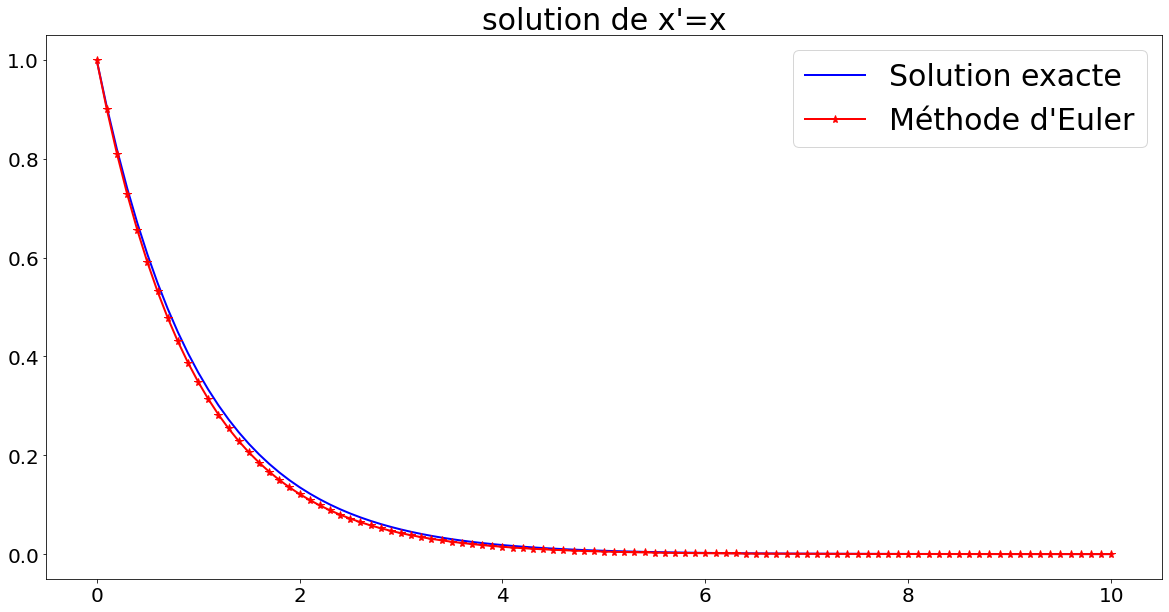

In [5]:
t=np.linspace(t0, t0+T,N+1)
plt.figure(figsize=(20, 10))
plt.plot(t, np.exp(-t), 'b',t,EE, 'r*-',linewidth=2,markersize=8)
plt.title("solution de x'=x",fontsize=30)
plt.legend(('Solution exacte','Méthode d\'Euler'),fontsize=30, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

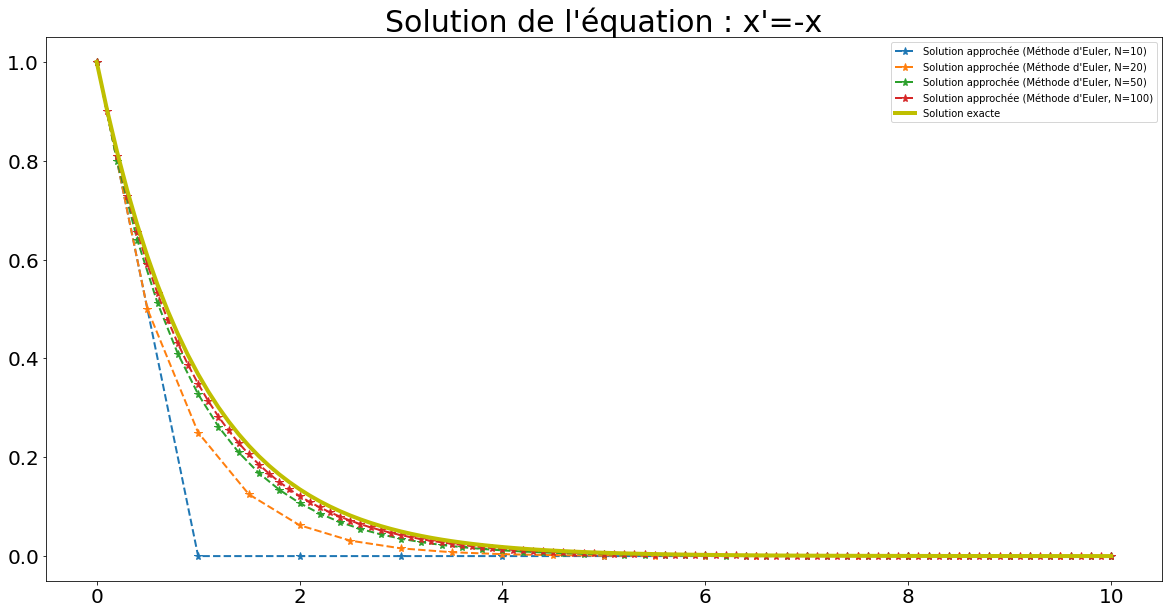

In [6]:
T = 10
t0 = 0
x0 = 1
plt.figure(figsize=(20, 10))
M = [10, 20, 50, 100]
for N in M:
    EE = eulerexplicite(f, x0, t0, T, N)
    t = np.linspace(t0, t0+T, N+1)
    plt.plot(t, EE, '*--', linewidth=2, markersize=8, label='Solution approchée (Méthode d\'Euler, N='+str(N)+')')
plt.plot(t, np.exp(-t), 'y', linewidth=4, markersize=8, label='Solution exacte')
plt.title("Solution de l\'équation : x'=-x", fontsize=30)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


## Méthode d'Euler implicite

Le schéma d'Euler implicite, pour la résolution du problème de Cauchy (PC) est donné par :  
\begin{equation*}
(S_2)\; \forall k \in  \{0,1,...,N-1\}, \quad x_{k+1}=x_k+h f(t_{k+1},x_{k+1})
\end{equation*}
avec $x(t_0)=x_0$.

On observe que cette relation ne procure pas une relation explicite de $x_{k+1}$ puisque ce terme est aussi présent
dans le second membre. Pour calculer ce terme il est souvent nécessaire de coupler cette méthode à une autre méthode
 numérique telle que la méthode de dichotomie, Newton, Euler  explicite,... Dans ce qui suit, nous adoptons la méthode d'Euler explicite. La démarche comporte deux étapes:


1) Approcher $x_{k+1}$ par la méthode d’Euler explicite comme suit :

$$ x_{k+1} = x_k + hf(t_k, x_k)      .       $$

2) Remplacer $x_{k+1}$ intervenue dans $f(t_{k+1}, x_{k+1})$ par son approximation trouvée dans la première étape.

Le schéma explicite ainsi obtenu est le suivant:

$\displaystyle p_1 = f( t_k,x_k),$  
        $\displaystyle p_2 = f( t_k+h,x_k + h p_1 )$  
        $x_0$ donnée
        

et
$$ (S_3)\; x_{k+1} = x_k + h p_2      $$

Programmation : 
--     
Rédiger une fonction `eulerimplicite_explicite(f, x0, t0,T,N)` qui prend en paramètres la fonction $f$, la valeur initiale $x_0$, la valeur initiale de la subdivision $t_0$, la largeur de l'intervalle $[t_0,t_0+T]$, $T$, sur lequel $x$ est définie,  et $N$ le nombre de sous-intervalles de  $[t_0,t_0+T]$ .   Cette fonction doit retourner  la liste des valeurs $[x_0,x_1, ... ,x_n]$ calculées par le schéma numérique donné ci-dessus.

In [7]:
def eulerimplicite_explicite(f, x0, t0,T,N):
    x = [x0]
    h=T/N
    for k in np.arange(0, N):
        p1 = f( t0+k*h,x[k])
        p2 = f( t0+(k+1)*h,x[k] + h*p1)
        x.append(x[k] + h*p2)
    return x

Exercice 2:
-- 
Refaire l'exercice 1 avec la méthode `eulerimplicite_explicite`.

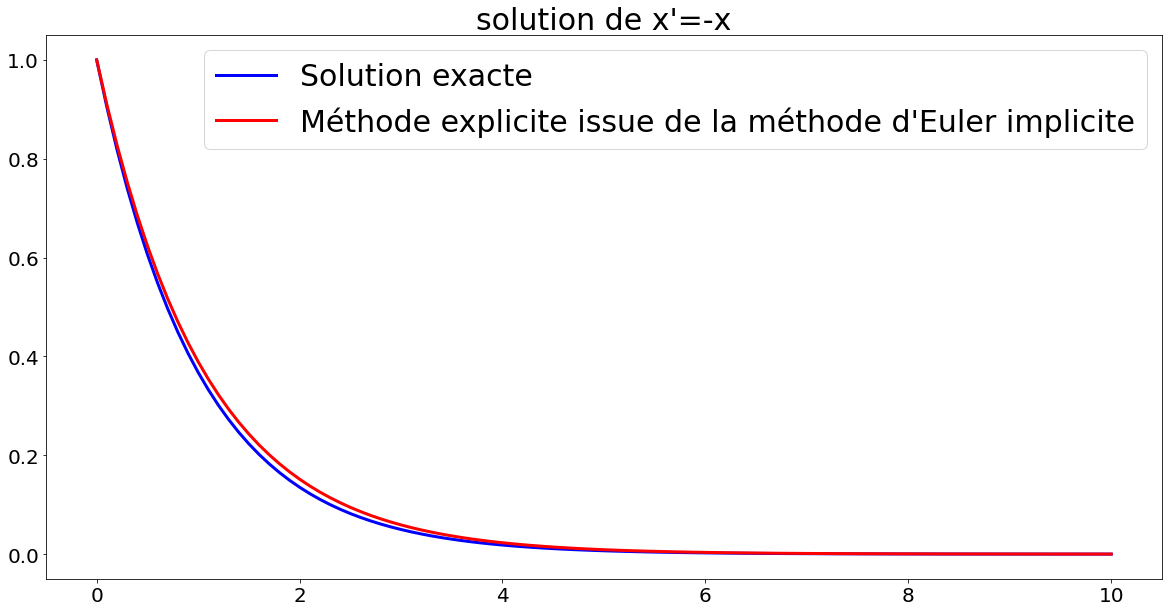

In [8]:
N=100
t=np.linspace(t0, t0+T,N+1)
EI=eulerimplicite_explicite(f, x0, t0,T,N)
plt.figure(figsize=(20, 10))
plt.plot(t, np.exp(-t), 'b',t,EI, 'r',linewidth=3)
plt.title("solution de x'=-x",fontsize=30)
plt.legend(('Solution exacte','Méthode explicite issue de la méthode d\'Euler implicite'),fontsize=30, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

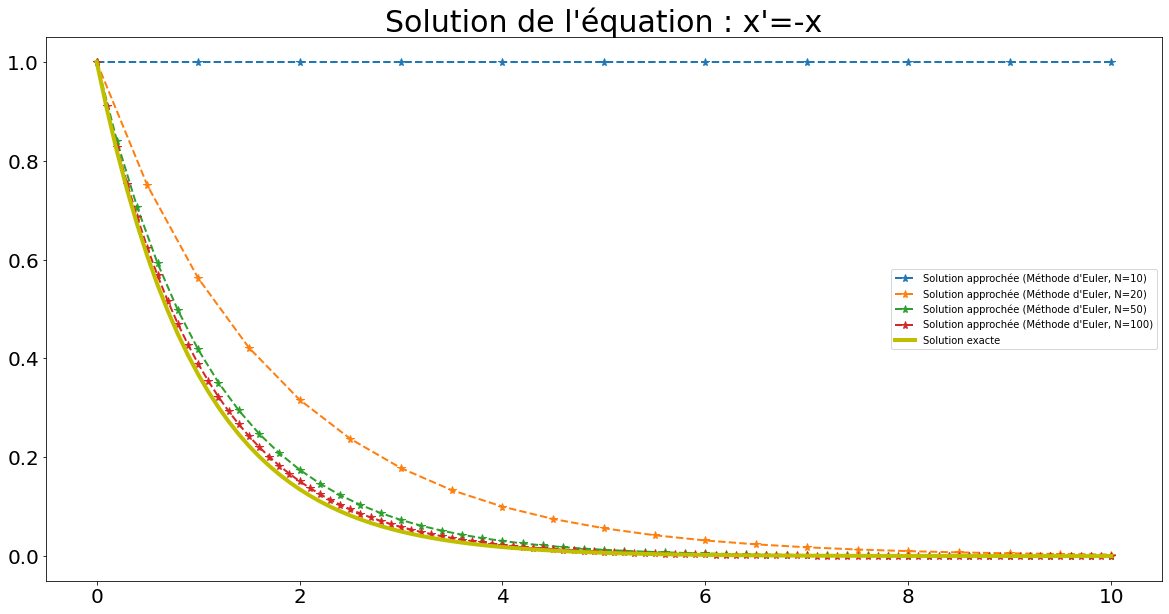

In [10]:
T = 10
t0 = 0
x0 = 1
plt.figure(figsize=(20, 10))
M = [10, 20, 50, 100]
for N in M:
    EI=eulerimplicite_explicite(f, x0, t0,T,N)
    t = np.linspace(t0, t0+T, N+1)
    plt.plot(t, EI, '*--', linewidth=2, markersize=8, label='Solution approchée (Méthode d\'Euler implicite, N='+str(N)+')')
plt.plot(t, np.exp(-t), 'y', linewidth=4, markersize=8, label='Solution exacte')
plt.title("Solution de l\'équation : x'=-x", fontsize=30)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# Exercice 3:  Comparaion des deux méthodes

- Dans la pratique, les méthodes d’Euler: implicite et  explicite  présentent des décalages importants de la solution exacte. Il est conseillé d'utiliser d'autre méthode de  résolution numériques plus rafinées telle que celle de Runge Kutta 4.
- Sur un même graphique, donner les solutions numériques du problème $(E)$ avec les deux méthodes programmées.
- Calculer les erreurs commises par les deux méthodes Euler Explicite et Euler implicite.


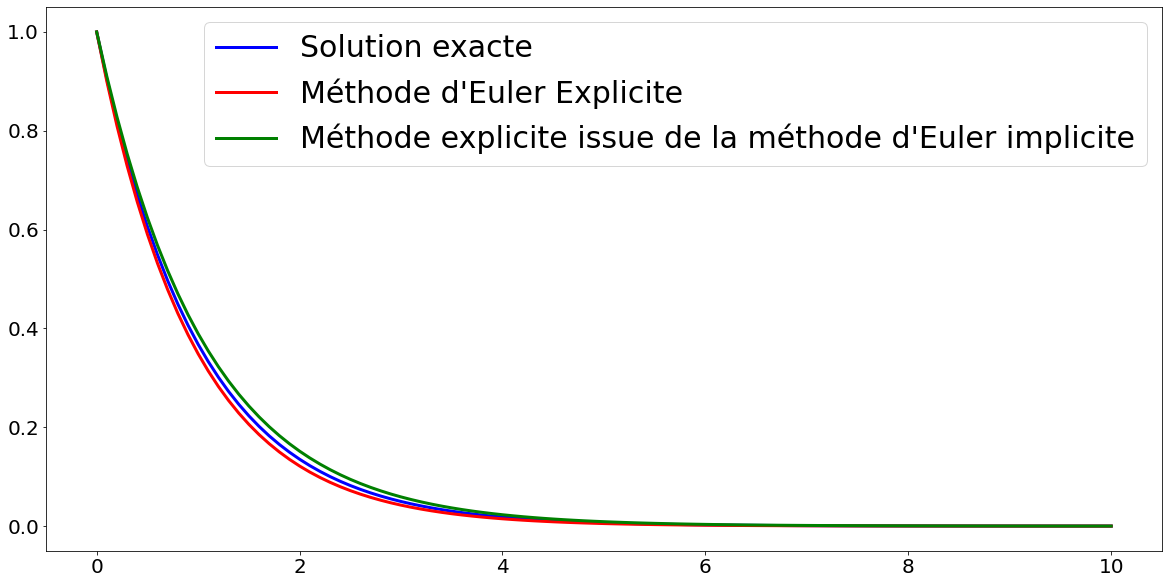

In [38]:
N=100
t=np.linspace(t0, t0+T,N+1)
EE = eulerexplicite(f, x0, t0, T, N)
EI=eulerimplicite_explicite(f, x0, t0,T,N)
plt.figure(figsize=(20, 10))
plt.plot(t, np.exp(-t), 'b',t,EE, 'r',t,EI, 'g',linewidth=3)
plt.legend(('Solution exacte','Méthode d\'Euler Explicite','Méthode explicite issue de la méthode d\'Euler implicite'),fontsize=30, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [40]:
print("L'erreur commise par la méthode d'Euler Explicite est",np.linalg.norm(np.exp(-t)-EE,1))
print("L'erreur commise par la méthode d'Euler Implicite est",np.linalg.norm(np.exp(-t)-EI,1))

L'erreur commise par la méthode d'Euler Explicite est 0.508139319762586
L'erreur commise par la méthode d'Euler Implicite est 0.6023999984307286


# Exercice 4

- Pour l'équation `(E)`, tracer les  courbes d'erreurs des deux méthodes déja implémentées en fonction de $t$.  
- Intérpreter le resultat.

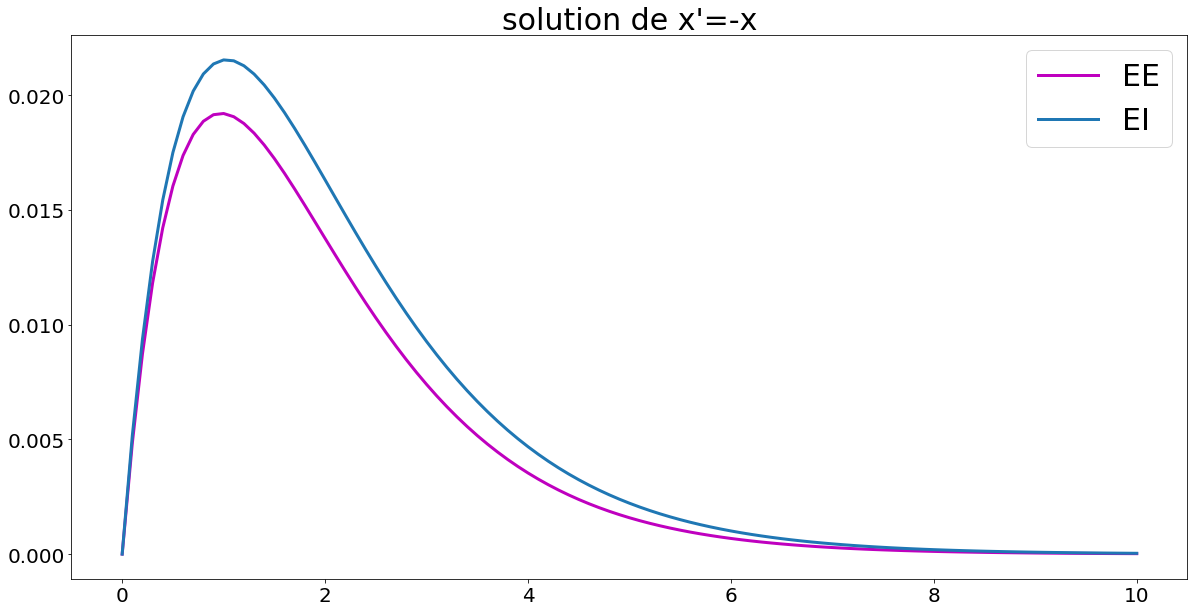

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(t, np.abs(np.exp(-t)-EE), 'm',t,np.abs(np.exp(-t)-EI),linewidth=3)
plt.title("solution de x'=-x",fontsize=30)
plt.legend(('EE','EI'),fontsize=30, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yscale('log')
plt.show()

# Partie asynchrone

# Application

Considérons une tasse de café à la température
de $75^{0}C$ dans une salle à $25^{0}C$. Aprés 5 minutes
le café est à $50^{0}$C. Si on suppose que la
vitesse de refroidissement du café est proportionnelle
à la différence des températures (i.e.
que la température du café suit la loi de Newton),
cela signifie qu’il existe une constante
$K < 0$ telle que la température T vérifie l’EDO
du premier ordre suivante :

$$T'(t) = K(T(t) − 25),$$

le temps t est exprimé en minutes et la température T en degré Celsius.

# Travail demandé:

1) Résoudre le probleme théoriquement.  


- Sachant que $T(0) = 75^{0}C$, l’expression de la solution analytique est de la forme :
$T(t) = 25 + 50e^{-\frac{\log(2)}{5}t}, \quad t >0.$

2) Utiliser les méthodes implémentées pour approcher numériquement cette solution. (Visualiser les solutions pour différents pas de discritisation.)

In [15]:
N=10
T=25
t0=0
x0=75

In [16]:
h=lambda t, x: (-np.log(2)/5)*(x-25)

In [17]:
t=np.linspace(t0, t0+T,N+1)
EI1=eulerimplicite_explicite(h, x0, t0,T,N)
EE1=eulerimplicite_explicite(h, x0, t0,T,N)
y0=25+50*np.exp(-np.log(2)*t/5)


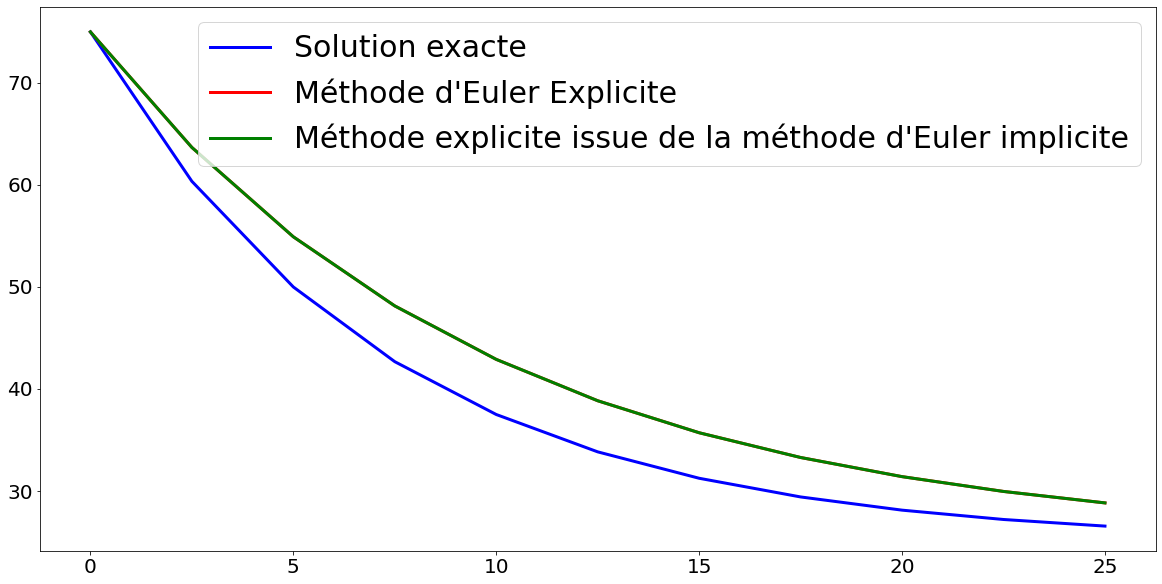

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(t, (25+50*np.exp(-np.log(2)*t/5)), 'b',t,EE1, 'r',t,EI1, 'g',linewidth=3)
plt.legend(('Solution exacte','Méthode d\'Euler Explicite','Méthode explicite issue de la méthode d\'Euler implicite', 'Méthode de Runge Kutta4'),fontsize=30, loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Références  

[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)  
[5] [Sympy Package](https://www.sympy.org/en/index.html)